In [1]:
import numpy as np
import pandas as pd
import soundfile as sf
import datetime as dt
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from pytz import timezone

from pathlib import Path

In [2]:
import sys

# # append the path of the
# # parent directory
sys.path.append('..')
sys.path.append('../src/')
sys.path.append('../src/models/bat_call_detector/batdetect2/')

In [3]:
import src.subsampling as ss

from src.cfg import get_config
from src.pipeline import pipeline

In [4]:
input_dir = f'{Path.home()}/Documents/Research/Symposium/Recordings/recover-20220828/UBNA_010'
summer_audio_files = sorted(list(Path(input_dir).iterdir()))
date = "20220826"
location = "Central Pond"

In [5]:
# ## Put together input parameters
plot_file_path = summer_audio_files[3]
plot_file = plot_file_path.name
plot_file_path
offset = 1800
plt.rcParams.update({'font.size': 18})

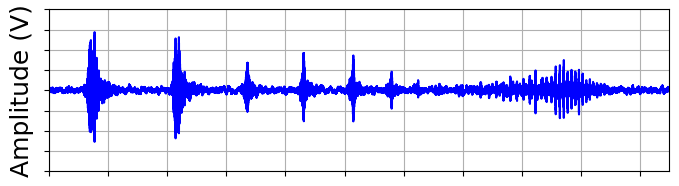

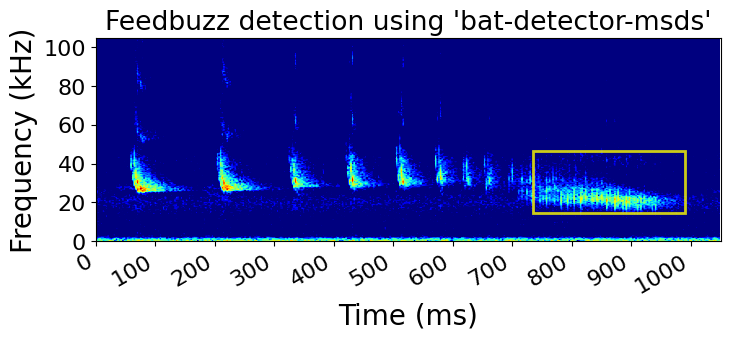

In [6]:
filepath = f"{Path.home()}/Documents/Research/Lab_related"
filename = "20210910_030000.WAV"

df = pd.read_csv('../output_dir/BatDetectorMSDS-20210910_030000.WAV.csv')
fbs = df.loc[np.logical_and(df['event']=='Feeding Buzz', df['high_freq'] < 47000)]

audio_file = sf.SoundFile(Path(f'{filepath}/{filename}'))
fs = audio_file.samplerate
offset = 0
reftimes = np.array([1439.8, 1440.85])
times = np.array([0, reftimes[1] - reftimes[0]])
step_size = 100
audio_file.seek(int(reftimes[0]*fs))
audio_sec = audio_file.read(int((reftimes[1] - reftimes[0])*fs))

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(8, 2.1))

plt.title(f"")
plt.plot(audio_sec, color='b')
plt.xticks(np.linspace(0, fs*(times[1]-0.05), len(np.arange(0, 1000*times[1], step_size))), '')
plt.xlabel(f'', fontsize=20)
plt.xlim(0, 1.05*fs)
amp_ticks = plt.yticks()[0]
plt.ylabel("Amplitude (V)", fontsize=18)
plt.yticks(np.arange(-1, 1.01, 0.25), '')
plt.ylim((-1, 1))
plt.grid(which="both")

plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 16})
plt.title(f'Feedbuzz detection using \'bat-detector-msds\'')

ss.plt_msds_fromdf("", filename, fbs, audio_sec, fs, offset, reftimes, times, 1800, 0.0, be_subplot=True, show_PST=True, show_legend=False, show_audio=False, show_spectrogram=True, spec_cmap='jet', spec_NFFT = 812, rm_dB = 90, save=False)

plt.xticks(np.linspace(0, times[1]-0.05, len(np.arange(0, 1000*times[1], step_size))), np.arange(0, 1000*times[1], step_size).astype('int'))
plt.yticks(np.linspace(0, 100000, 6), np.linspace(0, 100, 6).astype('int'))
plt.ylim(0, 105000)
plt.ylabel("Frequency (kHz)", fontsize=20)
plt.xlabel(f'Time (ms)', fontsize=20)
plt.show()

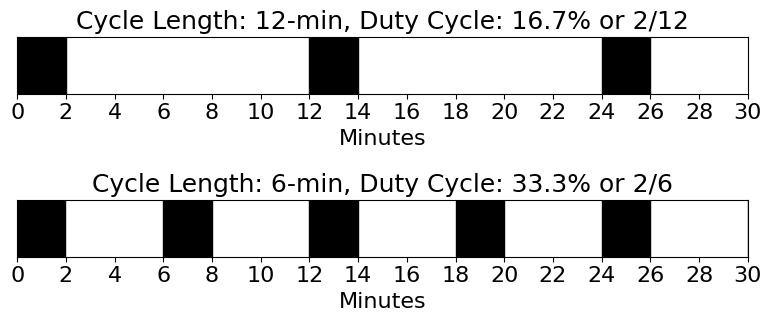

In [7]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

audio_file = sf.SoundFile(plot_file_path)
fs = audio_file.samplerate
offset = 1800
reftimes = np.array([0, 1800])
times = np.array([0, reftimes[1] - reftimes[0]])
audio_file.seek(int(reftimes[0]*fs))
audio_sec = audio_file.read(int((reftimes[1] - reftimes[0])*fs))

plt.figure(figsize=(8, 3.5))

cycle_length = 720
percent_on = 0.167
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
plt.subplot(211)
plt.title("Cycle Length: 12-min, Duty Cycle: 16.7% or 2/12", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=True, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=False, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks([], [])
plt.ylabel('')
plt.xticks(np.linspace(0, 1800, len(np.arange(0, 31, 2))), np.arange(0, 31, 2))
plt.xlabel('')
plt.xlabel("Minutes")

cycle_length = 360
percent_on = 0.333
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
plt.subplot(212)
plt.title("Cycle Length: 6-min, Duty Cycle: 33.3% or 2/6", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=False, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks([], [])
plt.ylabel('')
plt.xticks(np.linspace(0, 1800, len(np.arange(0, 31, 2))), np.arange(0, 31, 2))
plt.xlabel('')
plt.xlabel("Minutes")

plt.tight_layout()
plt.show()

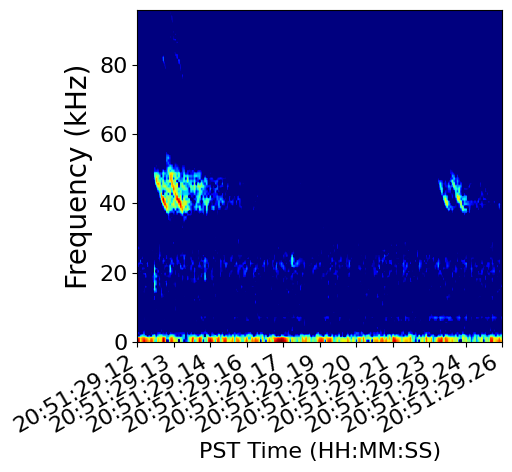

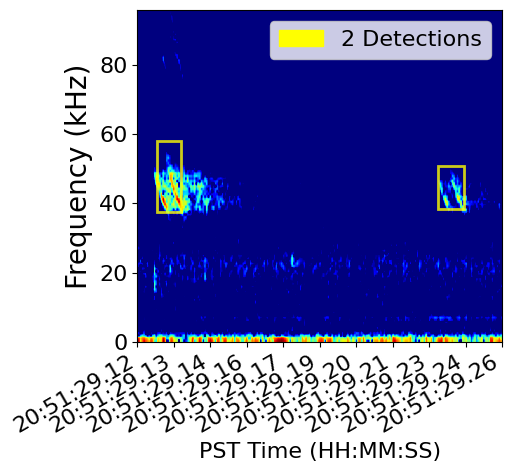

In [8]:
reftimes = np.array([1289.12, 1289.26])
times = np.array([0, reftimes[1] - reftimes[0]])
audio_file = sf.SoundFile(plot_file_path)
audio_file.seek(int(reftimes[0]*fs))
audio_sec = audio_file.read(int((reftimes[1] - reftimes[0])*fs))

plt.figure(figsize=(5.4, 5))
plt.rcParams.update({'font.size': 16})

ss.plt_msds_fromdf("", filename, plot_dets, audio_sec, fs, offset, reftimes, times, 1800, 0.0, be_subplot=True, show_PST=True, show_legend=False, det_linewidth=0, show_audio=False, show_spectrogram=True, spec_cmap='jet', rm_dB = 75, save=False)


plt.figure(figsize=(5.4, 5))
plt.rcParams.update({'font.size': 16})

ss.plt_msds_fromdf("", filename, plot_dets, audio_sec, fs, offset, reftimes, times, 1800, 0.0, be_subplot=True, show_PST=True, show_legend=False, show_num_dets=True, det_linewidth=2, show_audio=False, show_spectrogram=True, spec_cmap='jet', rm_dB = 75, save=False)

plt.show()

In [9]:
audio_file = sf.SoundFile(plot_file_path)
fs = audio_file.samplerate
reftimes = np.array([0, 1800])
times = np.array([0, reftimes[1] - reftimes[0]])
audio_file.seek(int(reftimes[0]*fs))
audio_sec = audio_file.read(int((reftimes[1] - reftimes[0])*fs))

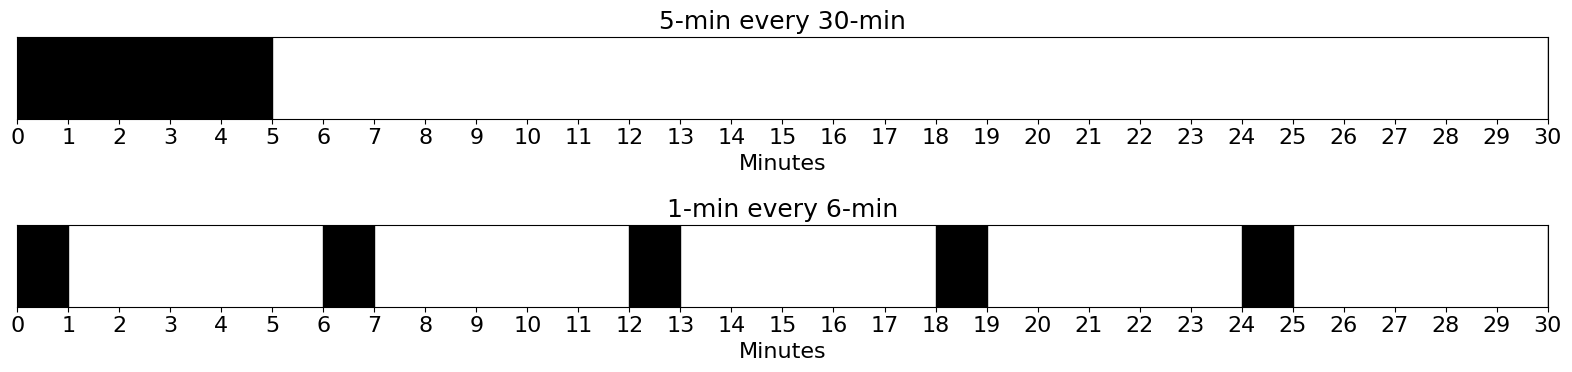

In [10]:
plt.figure(figsize=(16, 4))

cycle_length = 1800
percent_on = 0.167
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
plt.subplot(211)
plt.title("5-min every 30-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=True, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=False, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks([], [])
plt.ylabel('')
plt.xticks(np.linspace(0, 1800, len(np.arange(0, 31, 1))), np.arange(0, 31, 1))
plt.xlabel('')
plt.xlabel("Minutes")

cycle_length = 360
percent_on = 0.167
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
plt.subplot(212)
plt.title("1-min every 6-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=False, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks([], [])
plt.ylabel('')
plt.xticks(np.linspace(0, 1800, len(np.arange(0, 31, 1))), np.arange(0, 31, 1))
plt.xlabel('')
plt.xlabel("Minutes")

plt.tight_layout()
plt.show()